In [1]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb

In [2]:
pwd = '/Users/jimenagonzalez/research/DSPL/Simulations-Double-Source-Gravitational-Lensing/Data/Coordinates1/DES0000+0418/'
filename_g = '138780459_g.fits'
filename_i = '138780459_g.fits'
filename_r = '138780459_g.fits'

In [3]:
with fits.open(pwd + filename_g) as hdul:
    data_g = hdul[0].data
with fits.open(pwd + filename_i) as hdul:
    data_i = hdul[0].data
with fits.open(pwd + filename_r) as hdul:
    data_r = hdul[0].data
data_g.shape

(114, 114)

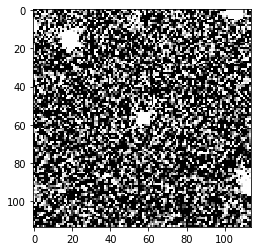

In [4]:
rgb = make_lupton_rgb(data_g, data_r, data_i, Q=2., stretch=4.)
plt.figure()    
plt.imshow(rgb)
plt.show()

/Users/jimenagonzalez/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log10


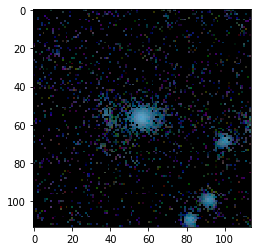

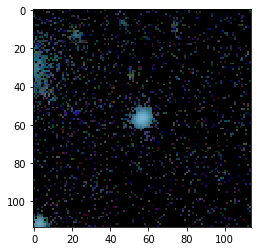

In [5]:
#Images of cutouts
directory_parent = 'Data/Coordinates1/'
folders = next(os.walk(directory_parent))[1]
n = 0
for folder in folders:
    files = sorted(next(os.walk(directory_parent + folder))[2])
    for file in files:
        if(file[-6:] == 'g.fits'):
            filename = file[:-7]
            if (n == 2):
                break
            g, i, r = '_g.fits', '_i.fits', '_r.fits'
            with fits.open(directory_parent + folder + '/' +filename+ g) as hdul:
                data_g = hdul[0].data
            with fits.open(directory_parent + folder + '/' +filename+ i) as hdul:
                data_i = hdul[0].data
            with fits.open(directory_parent + folder + '/' +filename+ r) as hdul:
                data_r = hdul[0].data
            rgb = make_lupton_rgb(np.log10(data_g), np.log10(data_r), np.log10(data_i), Q=1., stretch=3.)
            n += 1
            plt.figure()    
            plt.imshow(rgb)
            plt.show()

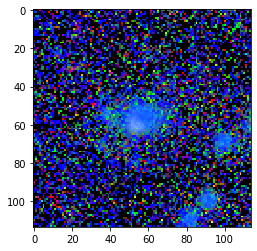

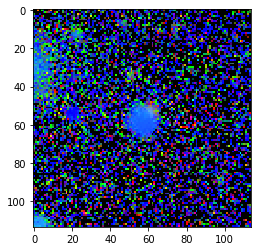

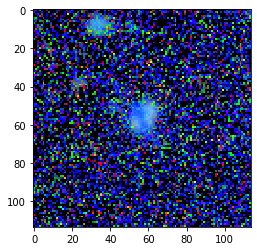

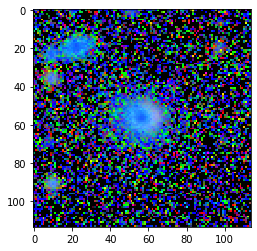

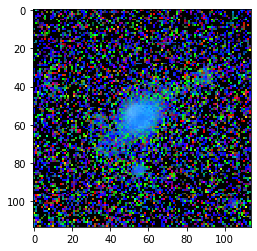

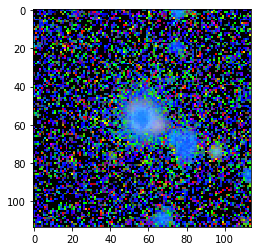

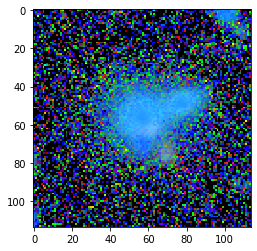

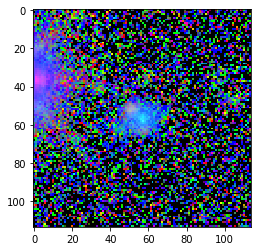

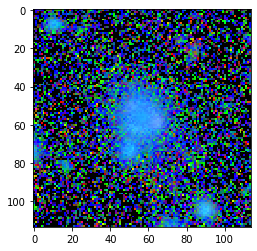

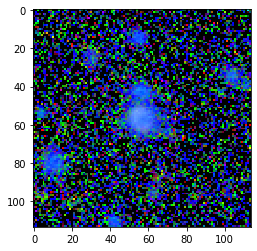

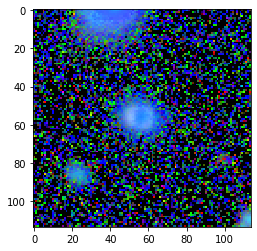

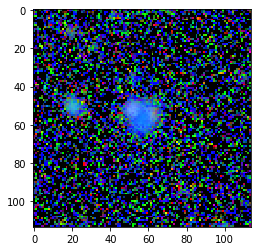

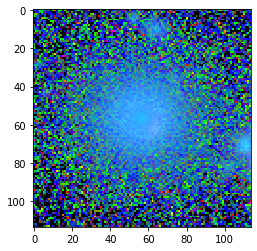

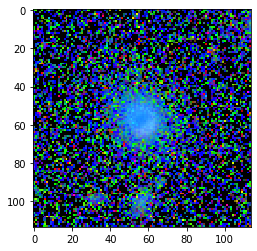

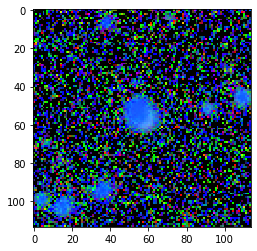

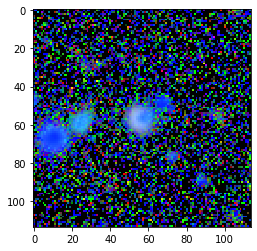

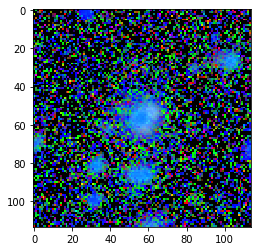

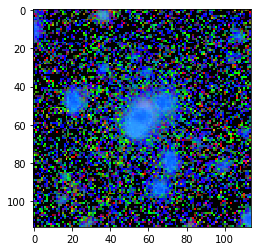

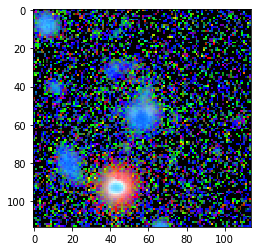

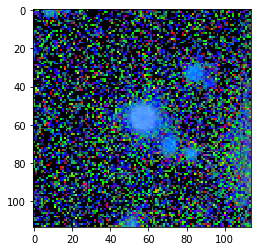

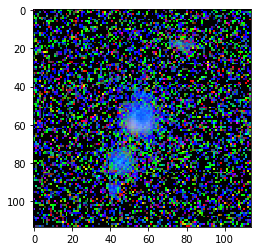

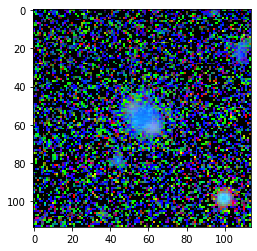

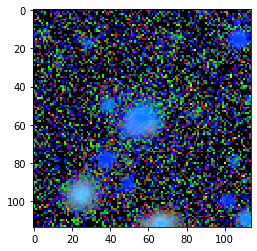

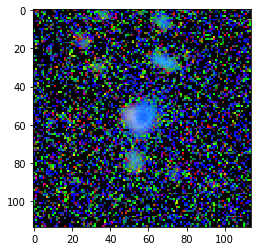

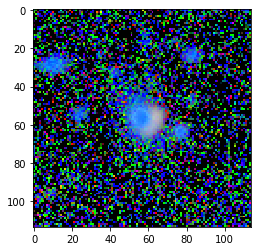

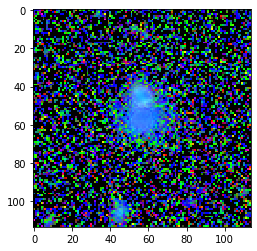

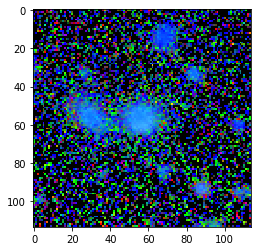

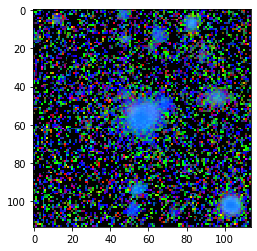

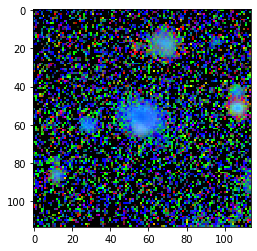

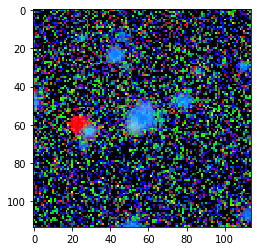

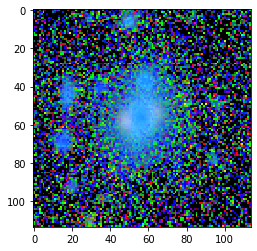

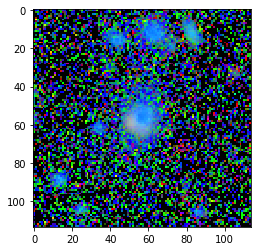

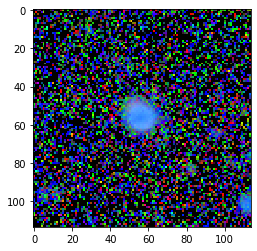

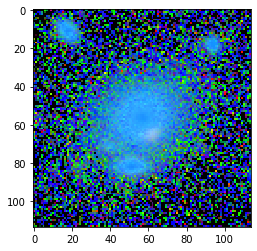

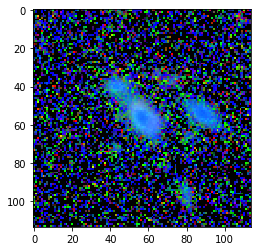

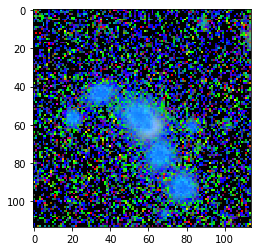

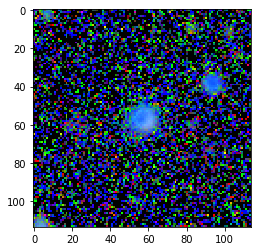

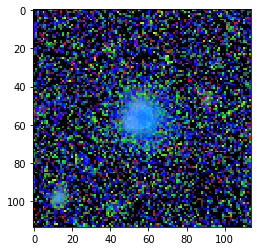

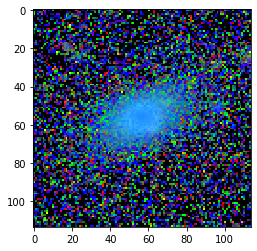

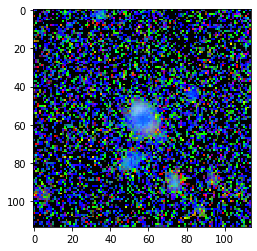

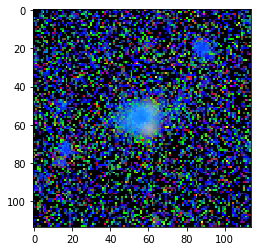

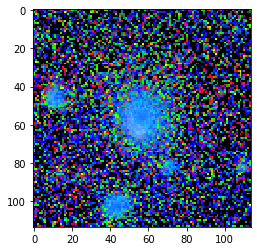

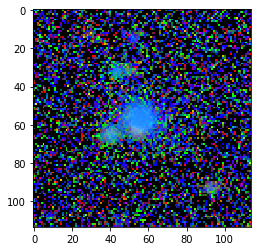

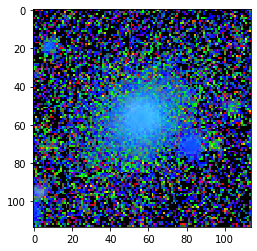

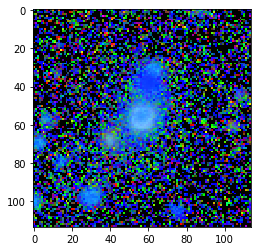

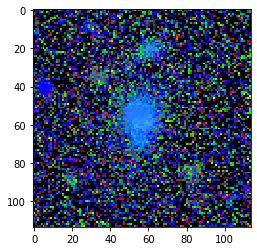

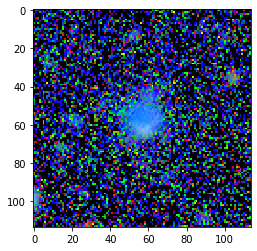

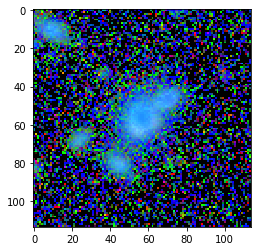

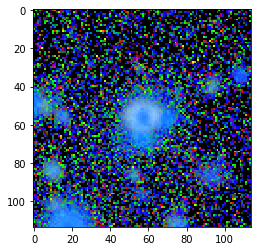

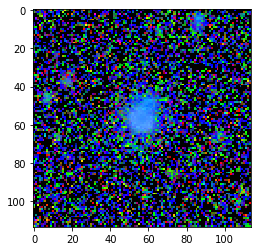

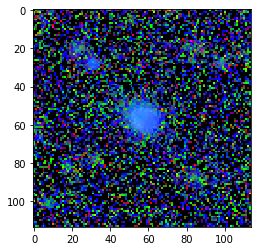

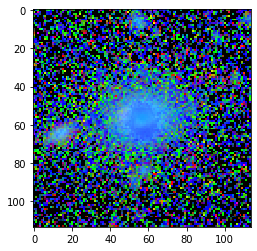

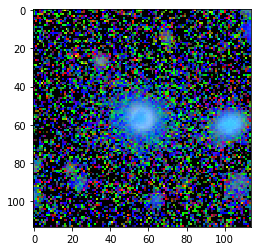

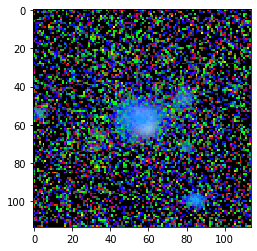

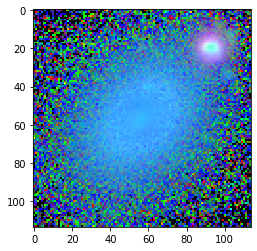

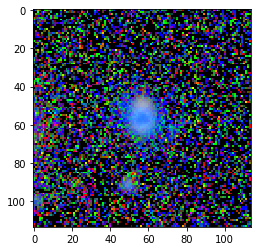

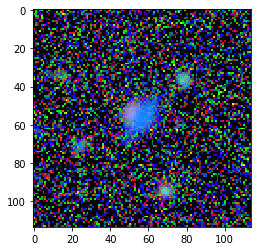

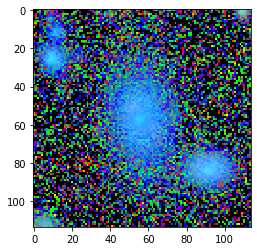

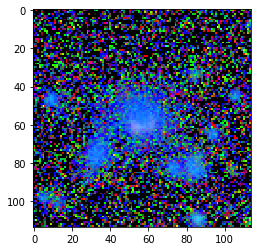

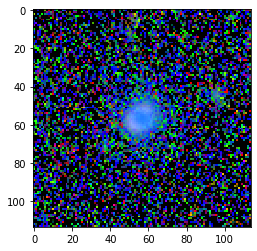

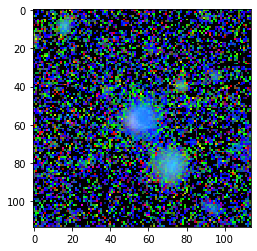

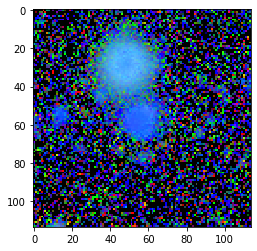

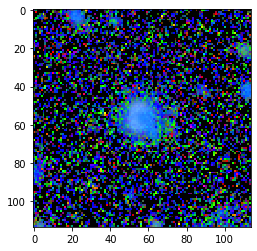

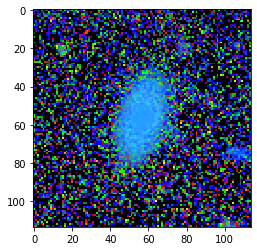

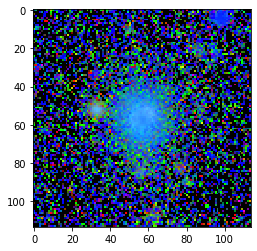

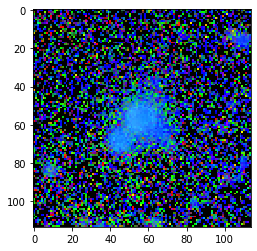

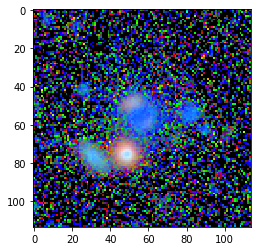

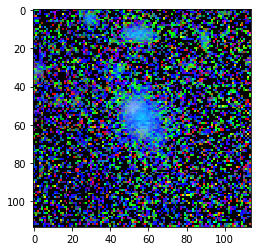

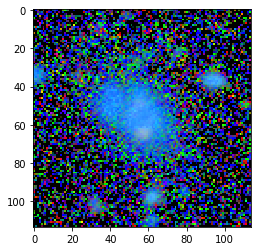

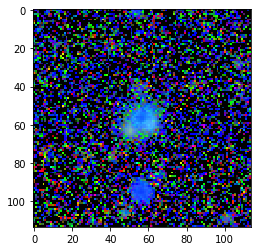

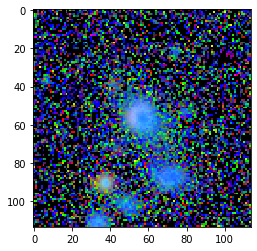

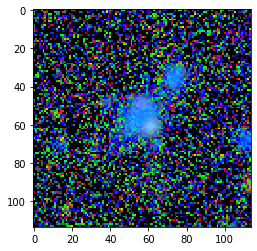

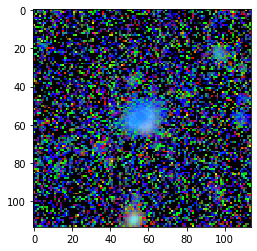

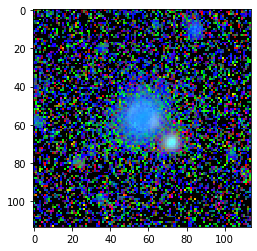

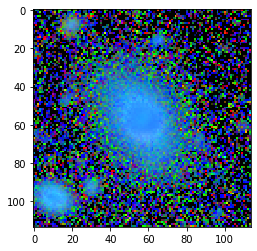

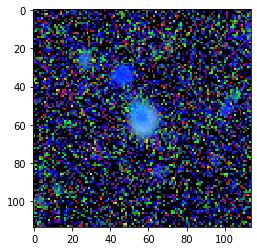

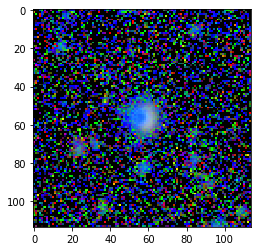

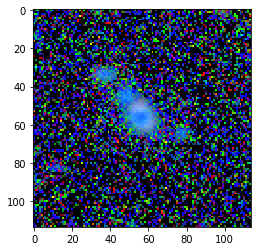

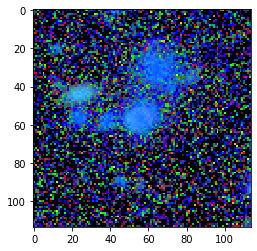

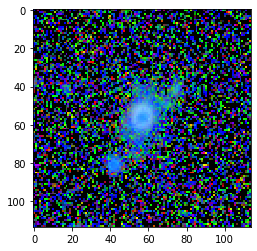

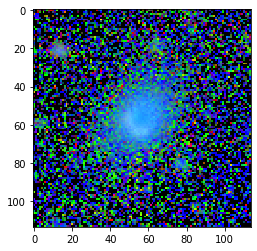

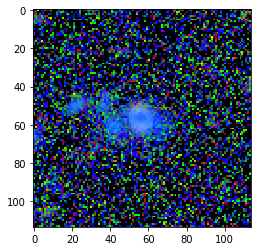

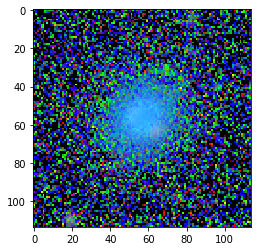

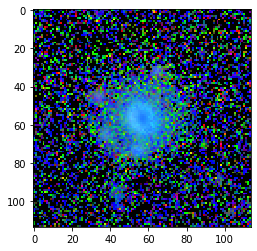

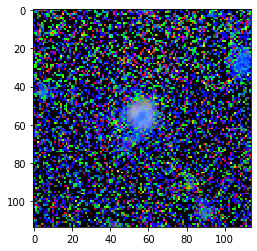

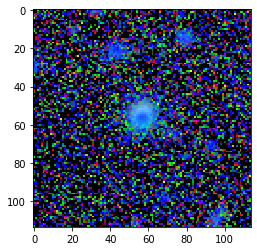

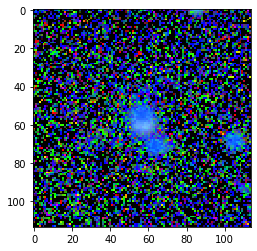

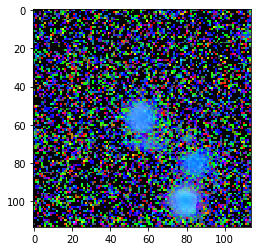

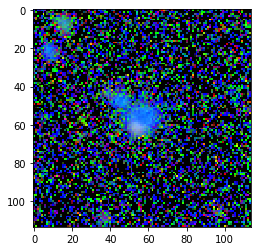

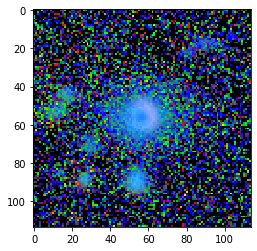

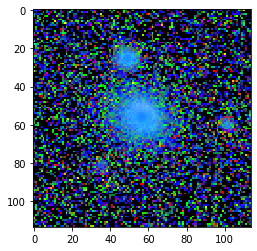

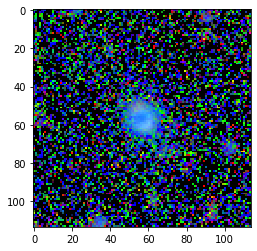

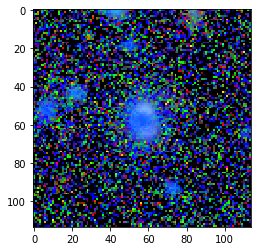

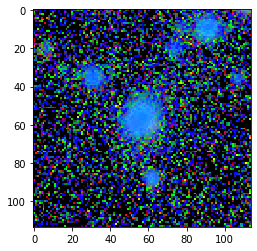

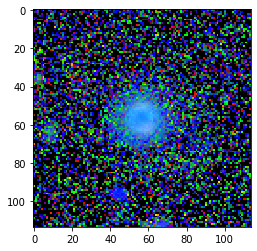

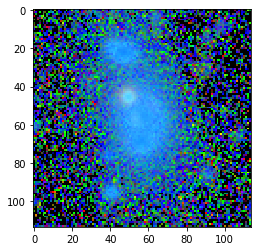

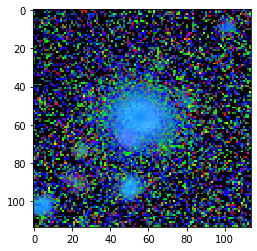

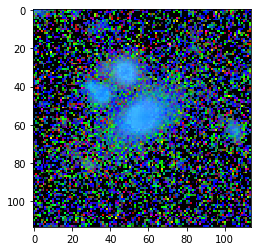

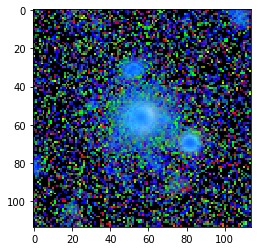

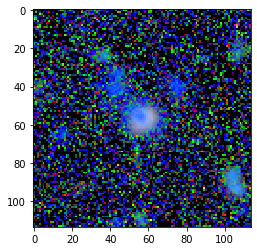

In [18]:
#Adding cutouts and simulations
directory_sim = '/Users/jimenagonzalez/research/DSPL/Simulations-Double-Source-Gravitational-Lensing/Data/Sim/'
directory_parent = 'Data/Coordinates1/'
folders = next(os.walk(directory_parent))[1]
n = 0
for folder in folders:
    files = sorted(next(os.walk(directory_parent + folder))[2])
    for file in files:
        if(file[-6:] == 'g.fits'):
            filename = file[:-7]
            if (n == 100):
                break
            g, i, r = '_g.fits', '_i.fits', '_r.fits'
            with fits.open(directory_parent + folder + '/' +filename+ g) as hdul:
                data_g = hdul[0].data
            with fits.open(directory_sim + 'sim_' + filename + g) as hdul:
                data_g += hdul[0].data
            with fits.open(directory_parent + folder + '/' +filename+ i) as hdul:
                data_i = hdul[0].data
            with fits.open(directory_sim + 'sim_' + filename + i) as hdul:
                data_i += hdul[0].data
            with fits.open(directory_parent + folder + '/' +filename+ r) as hdul:
                data_r = hdul[0].data
            with fits.open(directory_sim + 'sim_' + filename + r) as hdul:
                data_r += hdul[0].data
            hdu = fits.PrimaryHDU(data_g)
            hdul = fits.HDUList([hdu])
            hdul.writeto('Data/Sim_complete/sim_' + filename + '_g.fits')
            hdu = fits.PrimaryHDU(data_i)
            hdul = fits.HDUList([hdu])
            hdul.writeto('Data/Sim_complete/sim_' + filename + '_i.fits')
            hdu = fits.PrimaryHDU(data_r)
            hdul = fits.HDUList([hdu])
            hdul.writeto('Data/Sim_complete/sim_' + filename + '_r.fits')
            #rgb = make_lupton_rgb(np.log10(data_g), np.log10(data_r), np.log10(data_i), Q=1., stretch=3.)
            rgb = make_lupton_rgb(data_g, data_r, data_i, Q=10., stretch=4.)
            n += 1
            plt.figure()    
            plt.imshow(rgb)
            plt.show()